In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime
from scipy import stats
import yahoofinancials as yf
from pprint import pprint
import mplfinance as mpf

from IPython import display

In [2]:
ticker = 'ITSA4.SA'

start_date = '2022-03-07'
end_date =  '2023-03-07'

data = yf.YahooFinancials(ticker).get_historical_price_data(start_date, end_date, 'daily')

In [3]:
# Ler os dados do JSON
brkb_raw = pd.DataFrame(data[ticker]['prices']).dropna()
# Converter a data para o tipo correto datetime
brkb_raw['formatted_date'] = pd.to_datetime(brkb_raw['formatted_date'])
# Indica a data como o índice de cada linha
brkb_raw = brkb_raw.set_index('formatted_date')
# Visualiza o resultado
brkb_raw.head()

,date,high,low,open,close,volume,adjclose
formatted_date,,,,,,,
2022-03-07,1646658000,8.881818,8.645454,8.863636,8.681818,31452410,8.213097
2022-03-08,1646744400,8.772727,8.563636,8.727272,8.663636,33200970,8.195895
2022-03-09,1646830800,9.127272,8.681818,8.709090,9.127272,54577930,8.634499
2022-03-10,1646917200,9.045454,8.918181,9.000000,9.018181,20693090,8.531299
2022-03-11,1647003600,9.118181,8.863636,9.036363,8.927272,20494320,8.445297


In [4]:
brkb = brkb_raw.iloc[:,1:-1]
brkb.head()

,high,low,open,close,volume
formatted_date,,,,,
2022-03-07,8.881818,8.645454,8.863636,8.681818,31452410
2022-03-08,8.772727,8.563636,8.727272,8.663636,33200970
2022-03-09,9.127272,8.681818,8.709090,9.127272,54577930
2022-03-10,9.045454,8.918181,9.000000,9.018181,20693090
2022-03-11,9.118181,8.863636,9.036363,8.927272,20494320


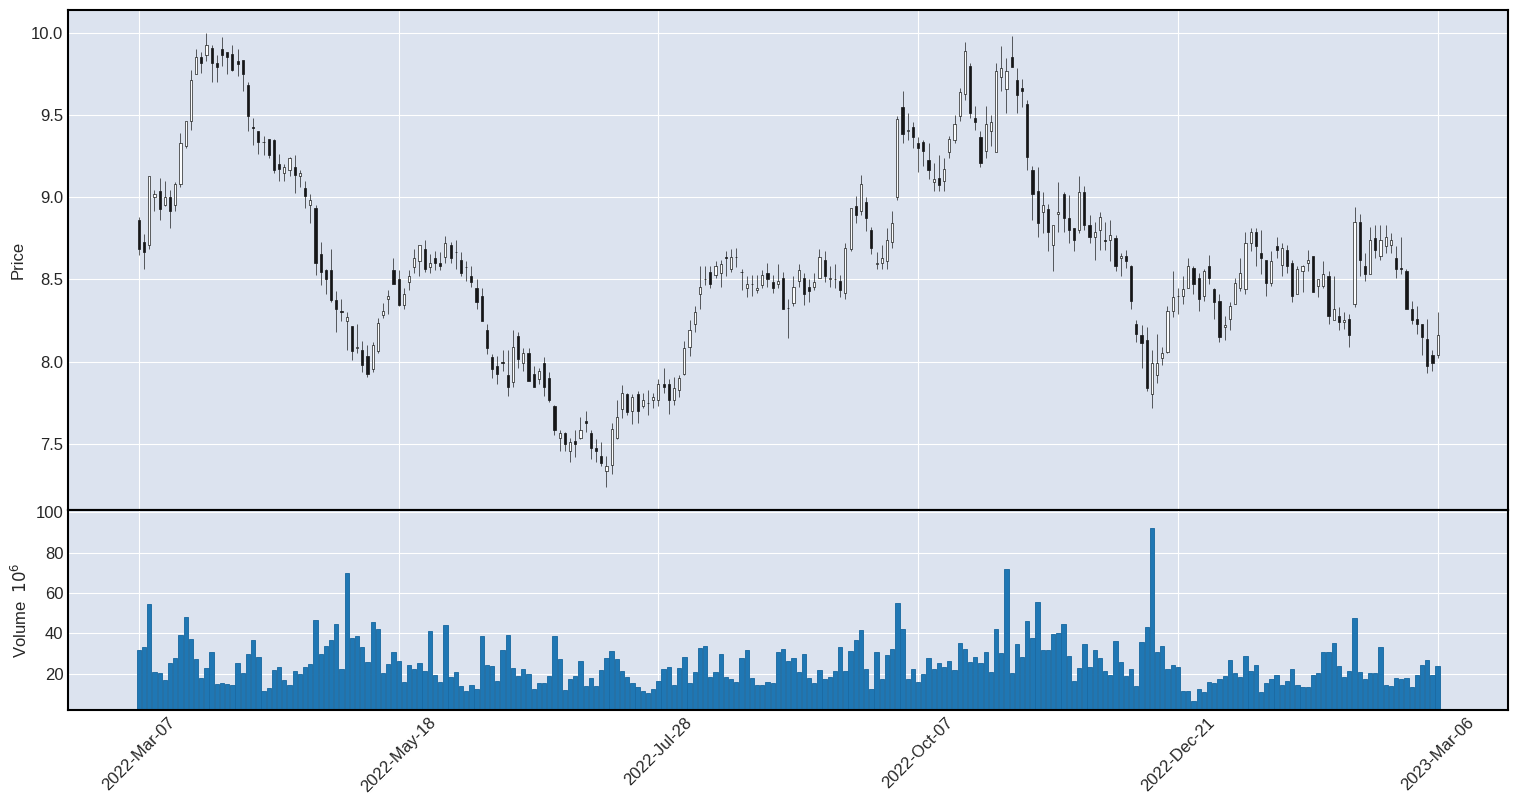

In [5]:
mpf.plot(brkb,type='candle', volume=True, figsize=(20,10))

### Lista: Exercício 1 - 14/Mar até 13h30

* Escolher alguma ação no yahoo finance (pode ser do exterior)
* Selecionar entre 6 meses a 1 ano de dados
* Usar o código da simulação acima para uma estratégia bem simples:
  * Comprar quando estiver caindo 1% em relação ao início da simulação
  * Sair da posição quando estiver ganhando ou perdendo 2% do preço de entrada
  * Entrar novamente quando o preço cair 1% do último preço de venda
* Montar um notebook próprio, não reutilizar da aula.
  * Organização: aquisição de dados, adequação e simulação
* Entregar um **PDF** com o código e o gráfico da simulação do resultado
* Prazo: 14/Mar até 13h30 via Blackboard (Após esse prazo será considerado atrasado)
* Estritamente individual

In [6]:
notional = brkb.close[0]
print(notional)
print(len(brkb))

8.681818008422852
251


In [23]:
i = 0
wallet_list = []
wallet = 1000
# last_sold = notional
last = brkb.close[0] 
position = 0
first = True
for price in brkb.close:
    #condicao de entrada
    if (price <= last*0.99) and position == 0:
        if wallet > price:
            wallet -= price
            last = price
            position = 1
            print("comprou")
    #condicao de saida
    elif (price >= last*1.02 or price <= last*0.98) and position == 1:
        wallet += price
        last = price
        position = 0
        print("vendeu")
    wallet_list.append(wallet)
    print(f"price: {price}")
    print(f"last 2%+: {last*0.02}")
    print(f"last 2%-: {-last*0.02}")
    print(f"last 1%-: {last*0.01}")
    print(f"wallet: {wallet}")
    print(f"price differece: {price - last}")
    print("========================================")
    print("")
        
        
print(f"resultado: {wallet_list[-1] - wallet_list[0]}")

price: 8.681818008422852
last 2%+: 0.17363636016845704
last 2%-: -0.17363636016845704
last 1%-: 0.08681818008422852
wallet: 1000
price differece: 0.0

price: 8.663636207580566
last 2%+: 0.17363636016845704
last 2%-: -0.17363636016845704
last 1%-: 0.08681818008422852
wallet: 1000
price differece: -0.018181800842285156

price: 9.12727165222168
last 2%+: 0.17363636016845704
last 2%-: -0.17363636016845704
last 1%-: 0.08681818008422852
wallet: 1000
price differece: 0.4454536437988281

price: 9.018180847167969
last 2%+: 0.17363636016845704
last 2%-: -0.17363636016845704
last 1%-: 0.08681818008422852
wallet: 1000
price differece: 0.3363628387451172

price: 8.927271842956543
last 2%+: 0.17363636016845704
last 2%-: -0.17363636016845704
last 1%-: 0.08681818008422852
wallet: 1000
price differece: 0.2454538345336914

price: 9.0
last 2%+: 0.17363636016845704
last 2%-: -0.17363636016845704
last 1%-: 0.08681818008422852
wallet: 1000
price differece: 0.31818199157714844

price: 8.918181419372559
last 

In [12]:
print(wallet_list)
print(len(wallet_list))

[1000, 1000, 1009.1272716522217, 1000.1090908050537, 1000.1090908050537, 1000.1090908050537, 1000.1090908050537, 1000.1090908050537, 1009.4363632202148, 1009.4363632202148, 1019.145453453064, 1019.145453453064, 1019.145453453064, 1029.0727252960205, 1019.2545442581177, 1019.2545442581177, 1019.2545442581177, 1019.2545442581177, 1019.2545442581177, 1019.2545442581177, 1019.2545442581177, 1028.7454528808594, 1028.7454528808594, 1019.4090900421143, 1019.4090900421143, 1019.4090900421143, 1019.4090900421143, 1019.4090900421143, 1019.4090900421143, 1019.4090900421143, 1028.5454530715942, 1028.5454530715942, 1019.5363626480103, 1019.5363626480103, 1028.13636302948, 1028.13636302948, 1019.63636302948, 1019.63636302948, 1027.9545440673828, 1027.9545440673828, 1027.9545440673828, 1027.9545440673828, 1027.9545440673828, 1027.9545440673828, 1027.9545440673828, 1027.9545440673828, 1027.9545440673828, 1027.9545440673828, 1027.9545440673828, 1027.9545440673828, 1027.9545440673828, 1027.9545440673828

In [8]:
brkb_raw["date"]

formatted_date
2022-03-07    1646658000
2022-03-08    1646744400
2022-03-09    1646830800
2022-03-10    1646917200
2022-03-11    1647003600
                 ...    
2023-02-28    1677589200
2023-03-01    1677675600
2023-03-02    1677762000
2023-03-03    1677848400
2023-03-06    1678107600
Name: date, Length: 251, dtype: int64

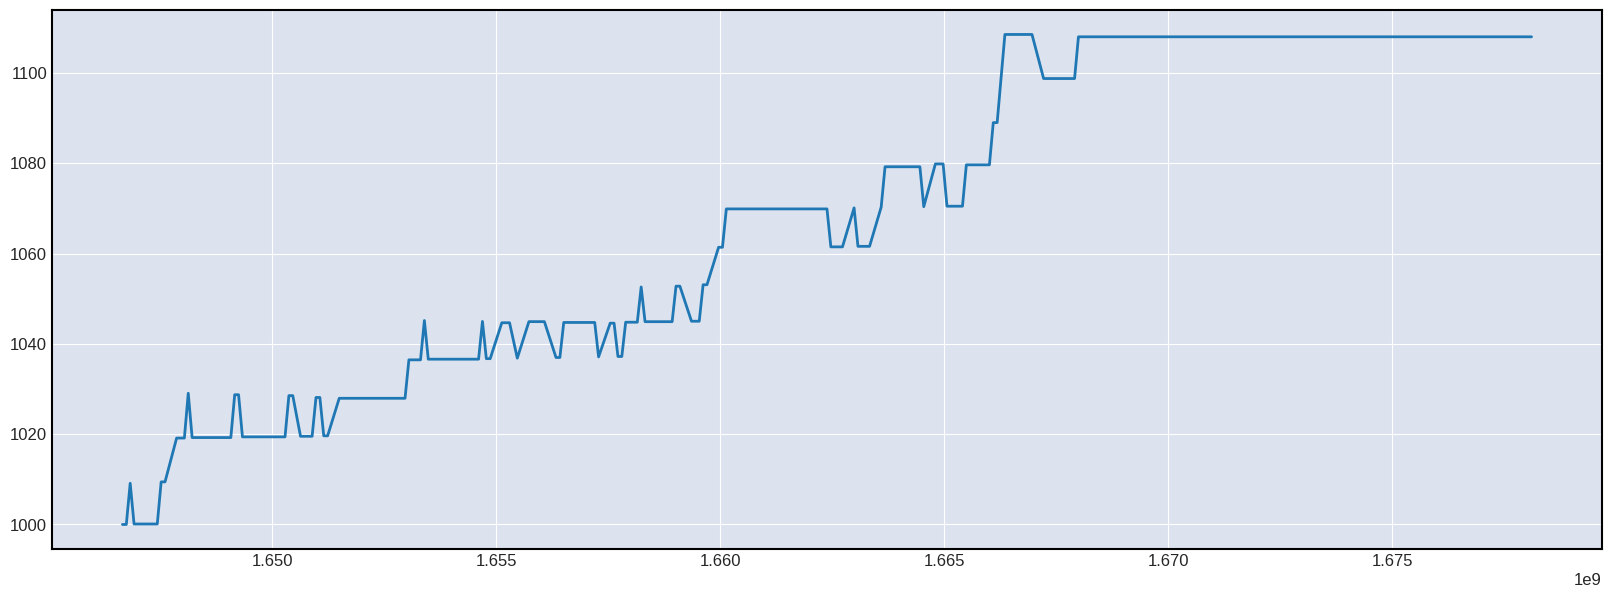

In [9]:
plt.figure(figsize=(20,7))
plt.plot(brkb_raw["date"], wallet_list)
# plt.plot(brkb_raw["date"], brkb_raw["close"])
plt.show()